## Monte Carlo Simulation

### Calculating PI :

In this section, we are about to estimate the value of pi, using "Monte Carlo" simulation. The final value of PI is calculated using the following formula :
$$
\frac{\pi}{4}= \frac{Area Of Inscribed Circle}{Area Of Square}
$$

Instead of area, the number of points fell within each region is substituted.

In [ ]:
# required packages :
import random

In [6]:
# PI estimation

NO_OF_ITERATIONS = 10**5

circle_points = 0
square_points = 0

for _ in range(NO_OF_ITERATIONS):
    # Generate random points in the square
    rand_x = random.uniform(0, 1)
    rand_y = random.uniform(0, 1)

    origin_dist = rand_x**2 + rand_y**2

    if origin_dist <= 1:
        circle_points += 1

    square_points += 1

# Estimate π
pi = 4 * (circle_points / square_points)

print(f"Final Estimation of Pi = {pi:.4f}")


Final Estimation of Pi = 3.1360


### Mensch Game Simulation :

In [9]:
# functions for simulating the game :

def roll_dice():
    """Simulate rolling a six-sided die."""
    return random.randint(1, 6)

def play_game():
    """Simulate a single game round."""
    player_positions = [0] * 4  # Initialize player positions
    winning_counts = [0] * 4   # Initialize counts for each player's wins
    rounds = 0
    for _ in range(100000):  # Simulate 100,000 game rounds
        
        for player in range(4):
            roll = roll_dice()
            player_positions[player] += roll
            player_positions[player] %= 40  # Wrap around the board

            if player_positions[player] == 39:  # Player reached the finish
                rounds +=1
                winning_counts[player] += 1

    
    winning_probabilities = [count / rounds for count in winning_counts]
    print(winning_counts)

    return winning_probabilities


In [10]:
#Simulation of the game :
probabilities = play_game()
for player, prob in enumerate(probabilities, start=1):
    print(f"Player {player}: Probability of winning = {prob}")


[2544, 2488, 2506, 2465]
Player 1: Probability of winning = 0.25432370288913325
Player 2: Probability of winning = 0.2487253823852844
Player 3: Probability of winning = 0.25052484254723584
Player 4: Probability of winning = 0.2464260721783465


## Central Limit Theorem :

In [12]:
#required packages :
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sp



In [19]:
NUMBER_OF_SAMPLES = 10000

def sampleMeanList(distributionFunctionCall, sampleSize, numberOfSamples, *args):
    means = []
    for i in range(numberOfSamples):
        # Generate random samples from the normal distribution
        
        samples = distributionFunctionCall(*args, size=sampleSize)
        sample_mean = np.mean(samples)
        means.append(sample_mean)
    
    obs = (numberOfSamples)**(1/3)
    h = 2*sp.stats.iqr(means)/obs
    
    return means, h





#### 1. Normal Distribution :

For the First Distribution to observe, we chose the Normal Distribution with parameters specified below :

In [23]:
# Noraml Distribution Parameters :
mu, sigma = 0, 1


- Sample Size : 20

59.83503653536999


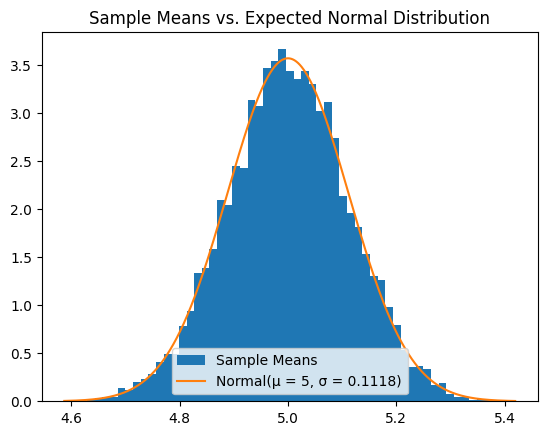

In [39]:

sampleSize = 20

means, h = sampleMeanList(np.random.normal, sampleSize, NUMBER_OF_SAMPLES, mu, sigma)
print((max(means) - min(means))/h)


# Visaulization :
x = np.linspace(min(means), max(means), num=1000 )
SE = sigma/math.sqrt(sampleSize)
p = sp.stats.norm.pdf(x, mu, SE)
fig, ax = plt.subplots()
ax.hist(means, bins = math.floor((max(means) - min(means))/h),density=True, label="Sample Means")
ax.plot(x, p, label=f"Normal(μ = {mu}, σ = {SE:.4f})")
plt.title('Sample Means vs. Expected Normal Distribution')
plt.legend()



68.09055031794874


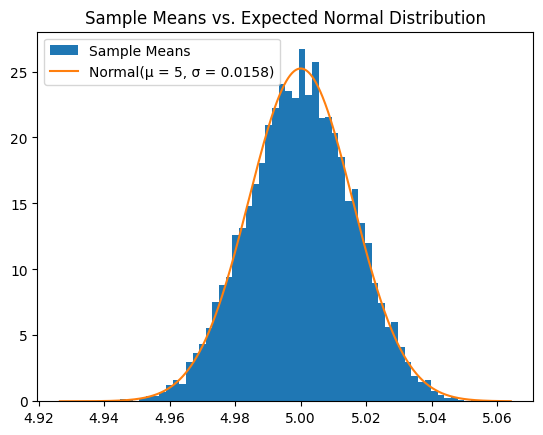

In [40]:
sampleSize = 1000

means, h = sampleMeanList(np.random.normal, sampleSize, NUMBER_OF_SAMPLES, mu, sigma)
print((max(means) - min(means))/h)


# Visaulization :
x = np.linspace(min(means), max(means), num=1000 )
SE = sigma/math.sqrt(sampleSize)
p = sp.stats.norm.pdf(x, mu, SE)
fig, ax = plt.subplots()
ax.hist(means, bins = math.floor((max(means) - min(means))/h),density=True, label="Sample Means")
ax.plot(x, p, label=f"Normal(μ = {mu}, σ = {SE:.4f})")
plt.title('Sample Means vs. Expected Normal Distribution')
plt.legend()


#### 2. Poisson Distribution :

In [37]:
# Poisson Distribution Parameters :
lam = 5

60.7858358973282


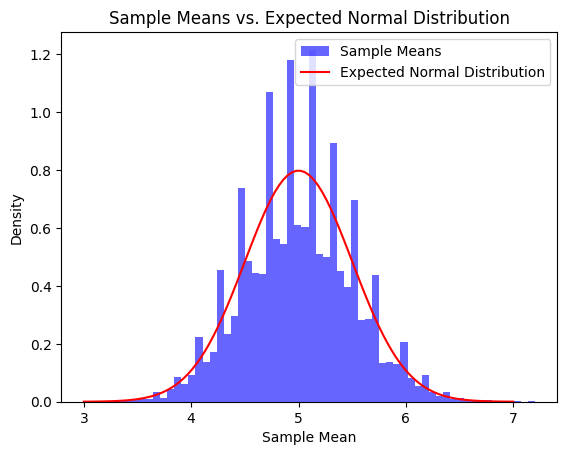

In [41]:

sampleSize = 20

means, h = sampleMeanList(np.random.poisson, sampleSize, NUMBER_OF_SAMPLES, lam)
print((max(means) - min(means))/h)

## Visaulization :

# Plot histogram
bins = math.floor((max(means) - min(means))/h)
plt.hist(means, bins=bins, density=True, alpha=0.6, color='blue', label='Sample Means')

mu = lam  # Mean of the Poisson distribution
SE = np.sqrt(mu)/math.sqrt(sampleSize)  # Standard deviation (approximated by the square root of the mean)
x = np.linspace(mu - 4*SE, mu + 4*SE, 100)

plt.plot(x, sp.stats.norm.pdf(x, mu, SE), 'r-', label='Expected Normal Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Sample Means vs. Expected Normal Distribution')
plt.legend()
plt.show()


59.85774731583409


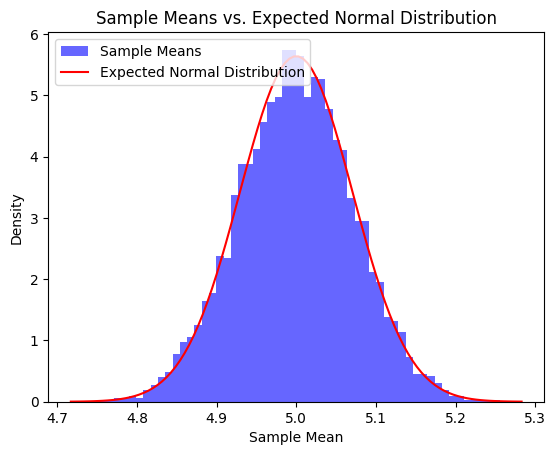

In [42]:

sampleSize = 1000

means, h = sampleMeanList(np.random.poisson, sampleSize, NUMBER_OF_SAMPLES, lam)
print((max(means) - min(means))/h)

## Visaulization :

# Plot histogram
bins = math.floor((max(means) - min(means))/h)
plt.hist(means, bins=bins, density=True, alpha=0.6, color='blue', label='Sample Means')

mu = lam  # Mean of the Poisson distribution
SE = np.sqrt(mu)/math.sqrt(sampleSize)  # Standard deviation (approximated by the square root of the mean)
x = np.linspace(mu - 4*SE, mu + 4*SE, 100)

plt.plot(x, sp.stats.norm.pdf(x, mu, SE), 'r-', label='Expected Normal Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Sample Means vs. Expected Normal Distribution')
plt.legend()
plt.show()


#### 3. rayleigh Distribution :

In [43]:
# Rayleigh parameters :
scale = 3

In [ ]:


sampleSize = 20
means = []
for i in range(10000):
# Generate random samples from the normal distribution
    samples = np.random.rayleigh(scale, sampleSize)
    sample_mean = np.mean(samples)
    means.append(sample_mean)



import scipy
import math
obs = (10000)**(1/3)
h = 2*scipy.stats.iqr(means)/obs
print((max(means) - min(means))/h)
bins = math.floor((max(means) - min(means))/h)
    
    

import matplotlib.pyplot as plt
import scipy.stats as stats

# Plot histogram
plt.hist(means, bins=bins, density=True, alpha=0.6, color='blue', label='Sample Means')

# Overlay with expected normal distribution
mu = scale * np.sqrt(np.pi / 2)  # Mean of the Rayleigh distribution
sigma = np.sqrt((4 - np.pi) / 2) * scale/math.sqrt(sampleSize)  # Standard deviation
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label='Expected Normal Distribution')

plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Sample Means vs. Expected Normal Distribution')
plt.legend()
plt.show()


65.88739039242499


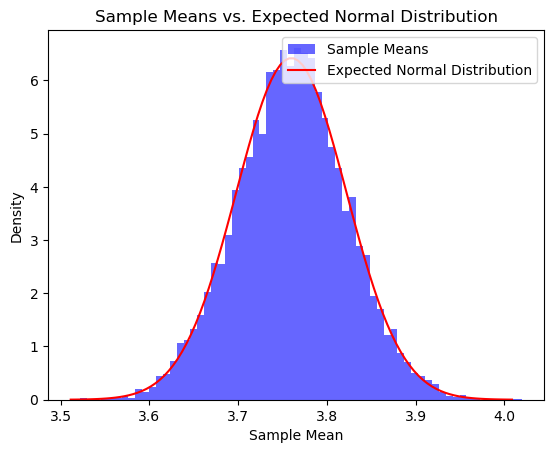

In [41]:
import numpy as np
import math
# Generate Rayleigh samples

scale = 3
sampleSize = 1000
means = []
for i in range(10000):
# Generate random samples from the normal distribution
    samples = np.random.rayleigh(scale, sampleSize)
    sample_mean = np.mean(samples)
    means.append(sample_mean)



import scipy
import math
obs = (10000)**(1/3)
h = 2*scipy.stats.iqr(means)/obs
print((max(means) - min(means))/h)
bins = math.floor((max(means) - min(means))/h)
    
    

import matplotlib.pyplot as plt
import scipy.stats as stats

# Plot histogram
plt.hist(means, bins=bins, density=True, alpha=0.6, color='blue', label='Sample Means')

# Overlay with expected normal distribution
mu = scale * np.sqrt(np.pi / 2)  # Mean of the Rayleigh distribution
sigma = np.sqrt((4 - np.pi) / 2) * scale/math.sqrt(sampleSize)  # Standard deviation
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label='Expected Normal Distribution')

plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Sample Means vs. Expected Normal Distribution')
plt.legend()
plt.show()


Confidence Interval: (494.0, 556.0)
0.10674954203432008


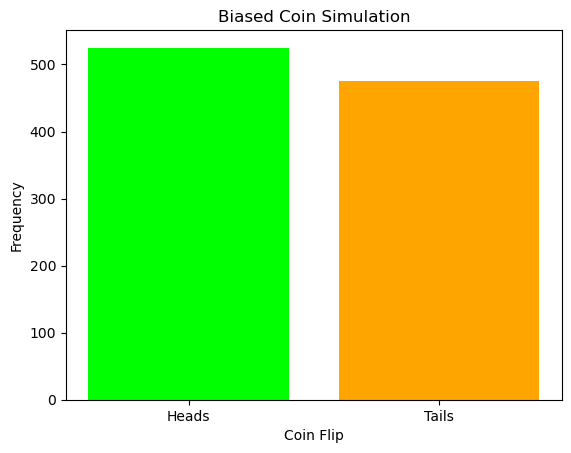

In [47]:
# unfair coin part

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Simulate biased coin flips
n_flips = 1000
p_heads_biased = 0.55  # 10% more likely than tails
coin_flips = np.random.choice(['H', 'T'], size=n_flips, p=[p_heads_biased, 1 - p_heads_biased])

# Calculate observed proportion of heads
observed_p_heads = np.sum(coin_flips == 'H') / n_flips
H = np.sum(coin_flips == 'H')
T = np.sum(coin_flips == 'T')
# Confidence Interval Approach
conf_interval = binom.interval(0.95, n_flips, observed_p_heads)
print(f"Confidence Interval: {conf_interval}")

# P-Value Approach
p_value = 2 * min(binom.cdf(observed_p_heads * n_flips, n_flips, 0.5), 1 - binom.cdf(observed_p_heads * n_flips, n_flips, 0.5))
print(p_value)
count = [H, T]
# Plot histogram of coin flips
plt.bar(['Heads', 'Tails'], [np.sum(coin_flips == 'H'), np.sum(coin_flips == 'T')], color=['lime', 'orange'])
plt.xlabel("Coin Flip")
plt.ylabel("Frequency")
plt.title("Biased Coin Simulation")
plt.show()


Confidence Interval: (54565.0, 55181.0)
0.0


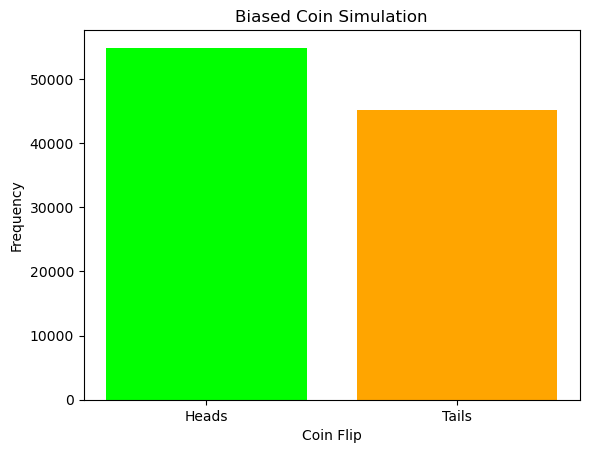

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Simulate biased coin flips
n_flips = 100000
p_heads_biased = 0.55  # 10% more likely than tails
coin_flips = np.random.choice(['H', 'T'], size=n_flips, p=[p_heads_biased, 1 - p_heads_biased])

# Calculate observed proportion of heads
observed_p_heads = np.sum(coin_flips == 'H') / n_flips
H = np.sum(coin_flips == 'H')
T = np.sum(coin_flips == 'T')
# Confidence Interval Approach
conf_interval = binom.interval(0.95, n_flips, observed_p_heads)
print(f"Confidence Interval: {conf_interval}")

# P-Value Approach
p_value = 2 * min(binom.cdf(observed_p_heads * n_flips, n_flips, 0.5), 1 - binom.cdf(observed_p_heads * n_flips, n_flips, 0.5))
print(p_value)
count = [H, T]
# Plot histogram of coin flips
plt.bar(['Heads', 'Tails'], [np.sum(coin_flips == 'H'), np.sum(coin_flips == 'T')], color=['lime', 'orange'])
plt.xlabel("Coin Flip")
plt.ylabel("Frequency")
plt.title("Biased Coin Simulation")
plt.show()


In [1]:
# T-test part

import pandas as pd

df = pd.read_csv('job_placement.csv')
df.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0


In [2]:
emp = df[df['placement_status'] == 'Placed']
unemp = df[df['placement_status'] == 'Not Placed']

In [3]:
emp.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
5,6,Sarah Wilson,Female,25,Bachelor's,Electronics and Communication,Columbia University,Placed,63000,3.7,1.0


In [4]:
empGrade = emp['gpa']
unempGrade = unemp['gpa']

In [5]:
import numpy as np
meanEmp = np.mean(empGrade)
meanUnemp = np.mean(unempGrade)

In [6]:
print(meanEmp)
print(meanUnemp)

3.76140350877193
3.702307692307692


In [7]:
from math import sqrt
stdA = np.std(empGrade)
stdB = np.std(unempGrade)
nA = len(empGrade)
nB = len(unempGrade)
t = (meanEmp - meanUnemp)/(sqrt((stdA**2 /nA) + (stdB**2 /nB)))
print(t)
df = nA + nB - 2
print(df)

4.458120678201741
698


In [8]:
import scipy.stats

# Example: Suppose t-score = 4.458 and df = 698 (right-tailed test)


p_value = scipy.stats.t.sf(abs(t), df=df)

print(p_value)

4.8157679831444565e-06


In [9]:
import numpy as np
from scipy import stats

stats.ttest_ind(empGrade, unempGrade)

Ttest_indResult(statistic=5.105318956468754, pvalue=4.2636444940967887e-07)

**Questions**

1) **Monte Carlo simulation in real life**:
    **Finance and Investment**:
    Valuation of Projects: Monte Carlo Simulations help assess the impact of risk in projects that require significant funds. By considering various scenarios, it provides a more accurate valuation.
    Stock Trading: Simulating profits or losses in online stock trading based on different market conditions.
    Complex Securities: Valuing complex financial instruments like American or European options.
    **Engineering and Science:**
    Reliability Analysis: Evaluating the reliability of complex systems (e.g., aircraft engines, bridges) by modeling uncertainties.
    Design Optimization: Optimizing designs by considering variations in material properties, manufacturing tolerances, and other factors.
    Nuclear Physics: Simulating particle interactions and decay processes.